# Курсовая работа по структурам и алгоритмам обработки данных
## Выполнила Крюкова Диана Романовна, БФИ2202

In [59]:
%pip install matplotlib
%pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


### Реализация хэш-таблицы

In [60]:
class HashTable:

    def __init__(self, size):
        self.size = size
        self.keys = [None for _ in range(self.size)]
        self.values = [None for _ in range(self.size)]
        self.hashFunc = lambda x: sum([ord(y) for y in x]) % self.size
    
    def put(self, key, value):
        hashkey = self.hashFunc(key)
        if self.keys[hashkey] is None:
            self.keys[hashkey] = key
            self.values[hashkey] = value
        else:
            if self.keys[hashkey] == key:
                self.values[hashkey] = value
            else:
                p = 1
                while p < self.size and self.keys[(hashkey + p) % self.size] is not None and self.keys[(hashkey + p) % self.size] != key:
                    p += 1
                if p == self.size:
                    print("Хэш-таблица заполнена!")
                else:
                    self.keys[(hashkey + p) % self.size] = key
                    self.values[(hashkey + p) % self.size] = value
        
    def get(self, key):
        hashkey = self.hashFunc(key)
        if self.keys[hashkey] is None:
            return None
        if self.keys[hashkey] == key:
            return self.values[hashkey]
        p = 1
        while (p < self.size) and self.keys[(hashkey + p) % self.size] is not None and self.keys[(hashkey + p) % self.size] != key:
            p += 1
        if p == self.size:
            return None
        return self.values[(hashkey + p) % self.size]

### Реализация извлечения данных из файла в формате csv

In [130]:
import csv

def read_csv(file_name):
    
    data = HashTable(512)

    with open(file_name, "r", encoding= 'utf-8-sig') as file:
        reader = csv.reader(file, delimiter=";")
        
        for row in reader:
            try:    
                order_num, order_date, product_name, product_category, sold_qty, unit_price, total_cost = row
                sold_qty, total_cost = int(sold_qty), int(total_cost)
            except:
                continue

            if not all([order_num, order_date, product_name, product_category, sold_qty, unit_price, total_cost]):
                continue

            if data.get(product_name) is None:
                data.put(product_name, {"Category" : product_category, "Quantity" : sold_qty, "Cost" : total_cost})
            else:
                product_row = data.get(product_name)
                data.put(product_name, {"Category" : product_category, "Quantity" : sold_qty + product_row["Quantity"], "Cost" : total_cost + product_row["Cost"]})

    return data

### Реализация анализа данных о продажах магазина

In [131]:
def count_total_revenue(data):
    total_revenue = 0
    for product in data.keys:
        if product != None:
            total_revenue += data.get(product)["Cost"]
    return total_revenue

def find_product_with_max_quantity(data):
    product_with_max_quantity = []
    max_quantity = 0
    for product in data.keys:
        if product != None:
            product_data = data.get(product)
            if max_quantity < product_data["Quantity"]:
                product_with_max_quantity = [product]
                max_quantity = product_data["Quantity"]
            elif max_quantity == product_data["Quantity"]:
                product_with_max_quantity += [product]
    return [product_with_max_quantity, max_quantity]

def find_product_with_max_cost(data):
    product_with_max_cost = []
    max_cost = 0
    for product in data.keys:
        if product != None:
            product_data = data.get(product)
            if max_cost < product_data["Cost"]:
                product_with_max_cost = [product]
                max_cost = product_data["Cost"]
            elif max_cost == product_data["Cost"]:
                product_with_max_cost += [product]
    return [product_with_max_cost, max_cost]

def find_parts_in_revenue(data, total_revenue):
    analyzed_revenue = []

    for product in data.keys:
        if product != None:
            product_data = data.get(product)
            analyzed_revenue.append({"Product name" : product, "Quantity" : product_data["Quantity"], "Revenue part" : product_data["Cost"] / total_revenue})
    return analyzed_revenue

### Реализация сортировки массива данных

In [132]:
def sort(data, sort_key):
    step = len(data) // 2
    while step > 0:
        for i in range(step, len(data)):
            k = i
            delta = k - step
            while delta >= 0 and data[delta][sort_key] < data[k][sort_key]:
                data[delta], data[k] = data[k], data[delta]
                k = delta
                delta = k - step
        step //= 2
    return data

### Реализация текстовой части отчёта

In [133]:
def text_report(total_revenue, product_with_max_quantity, product_with_max_cost, data):
    print("Отчёт по продажам:\n")

    print("Общая выручка магазина равна", total_revenue, "руб.")

    if len(product_with_max_quantity[0]) > 1:
        products = product_with_max_quantity[0][0]
        for i in product_with_max_quantity[0][1:]:
            products += ", " + i
        print("Товары с наибольшим количеством проданного: " + products + ", продано " + str(product_with_max_quantity[1]) + " штук каждого.", sep = "")
    else:
        print("Товар с наибольшим количеством проданного: " + product_with_max_quantity[0][0] + ", продано " + str(product_with_max_quantity[1]) + " штук.", sep = "")

    if len(product_with_max_cost[0]) > 1:
        products = product_with_max_cost[0][0]
        for i in product_with_max_cost[0][1:]:
            products += ", " + i
        print("Товары с наибольшей стоимостью проданного: " + products + ", продано на " + str(product_with_max_cost[1]) + " руб. каждого.", sep = "")
    else:
        print("Товар с наибольшей стоимостью проданного: " + product_with_max_cost[0][0] + ", продано на " + str(product_with_max_cost[1]) + " руб.", sep = "")

    print("\nОтчёт по отварам:\nНаименование товара\t\tПроданное количество\tДоля в выручке")
    for row in data:
        print(row["Product name"] + ("\t" * (4 - ((len(row["Product name"]))//8))) + str(row["Quantity"]) + "\t" * (3 - (len(str(row["Quantity"]))//8)) + (str(row["Revenue part"] * 100) + "%"))

### Графическое представление распределения выручки магазина

In [134]:
import matplotlib.pyplot as plt
import numpy as np

def graph_report(data):
    labels = [x["Product name"] for x in data]
    units_sold = [x["Quantity"] for x in data]
    revenue_percentage = [round(x["Revenue part"] * 100, 2) for x in data]

    x = np.arange(len(labels))
    width = 0.35

    fig, ax1 = plt.subplots(figsize=(30, 15))

    rects1 = ax1.bar(x - width/2, units_sold, width, label="Количество проданных единиц товара", color="b")
    ax1.set_xlabel("Наименование товара")
    ax1.set_ylabel("Количество проданных единиц товара", color="b")
    ax1.tick_params(axis="y", labelcolor="b")

    ax2 = ax1.twinx()
    rects2 = ax2.bar(x + width/2, revenue_percentage, width, label="Доля товара в выручке", color="g")
    ax2.set_ylabel("Доля товара в выручке (%)", color="g")
    ax2.tick_params(axis="y", labelcolor="g")

    ax1.set_xticks(x)
    ax1.set_xticklabels(labels)

    def autolabel(rects, ax, offset=0):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f"{height}",
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, offset),
                        textcoords="offset points",
                        ha="center", va="bottom")

    autolabel(rects1, ax1, offset=3)
    autolabel(rects2, ax2, offset=3)

    fig.legend(loc="upper left", bbox_to_anchor=(0.2,0.9))

    fig.tight_layout()

    plt.show()

### Отчёт о продажах магазина

Отчёт по продажам:

Общая выручка магазина равна 118031560 руб.
Товар с наибольшим количеством проданного: Контейнер пищевой, продано 13087 штук.
Товар с наибольшей стоимостью проданного: Утюг, продано на 14478000 руб.

Отчёт по отварам:
Наименование товара		Проданное количество	Доля в выручке
Утюг				9652			12.266210833780388%
Чайник				6668			11.29867299898434%
Лимонад				8503			10.806008155784774%
Футболка			7856			9.983770442413876%
Худи				4596			9.73468451997076%
Гель для стирки			9839			8.335906091557208%
Настольная лампа		9495			8.044458617678186%
Колбаса				11546			4.891064728789487%
Верёвка				10232			4.334433942921707%
Брюки				1182			4.005708303779091%
Микроволновая печь		1142			3.8701513391841975%
Удлинитель			8771			2.9724253411545183%
Носки				8711			2.214068847348963%
Средство для мытья посуды	11588			1.9635426321570264%
Шампунь				7260			1.8452691805479822%
Пылесос				266			1.1268172681950488%
Контейнер пищевой		13087			1.1087712472833537%
Мыло				10258			0.86908958925

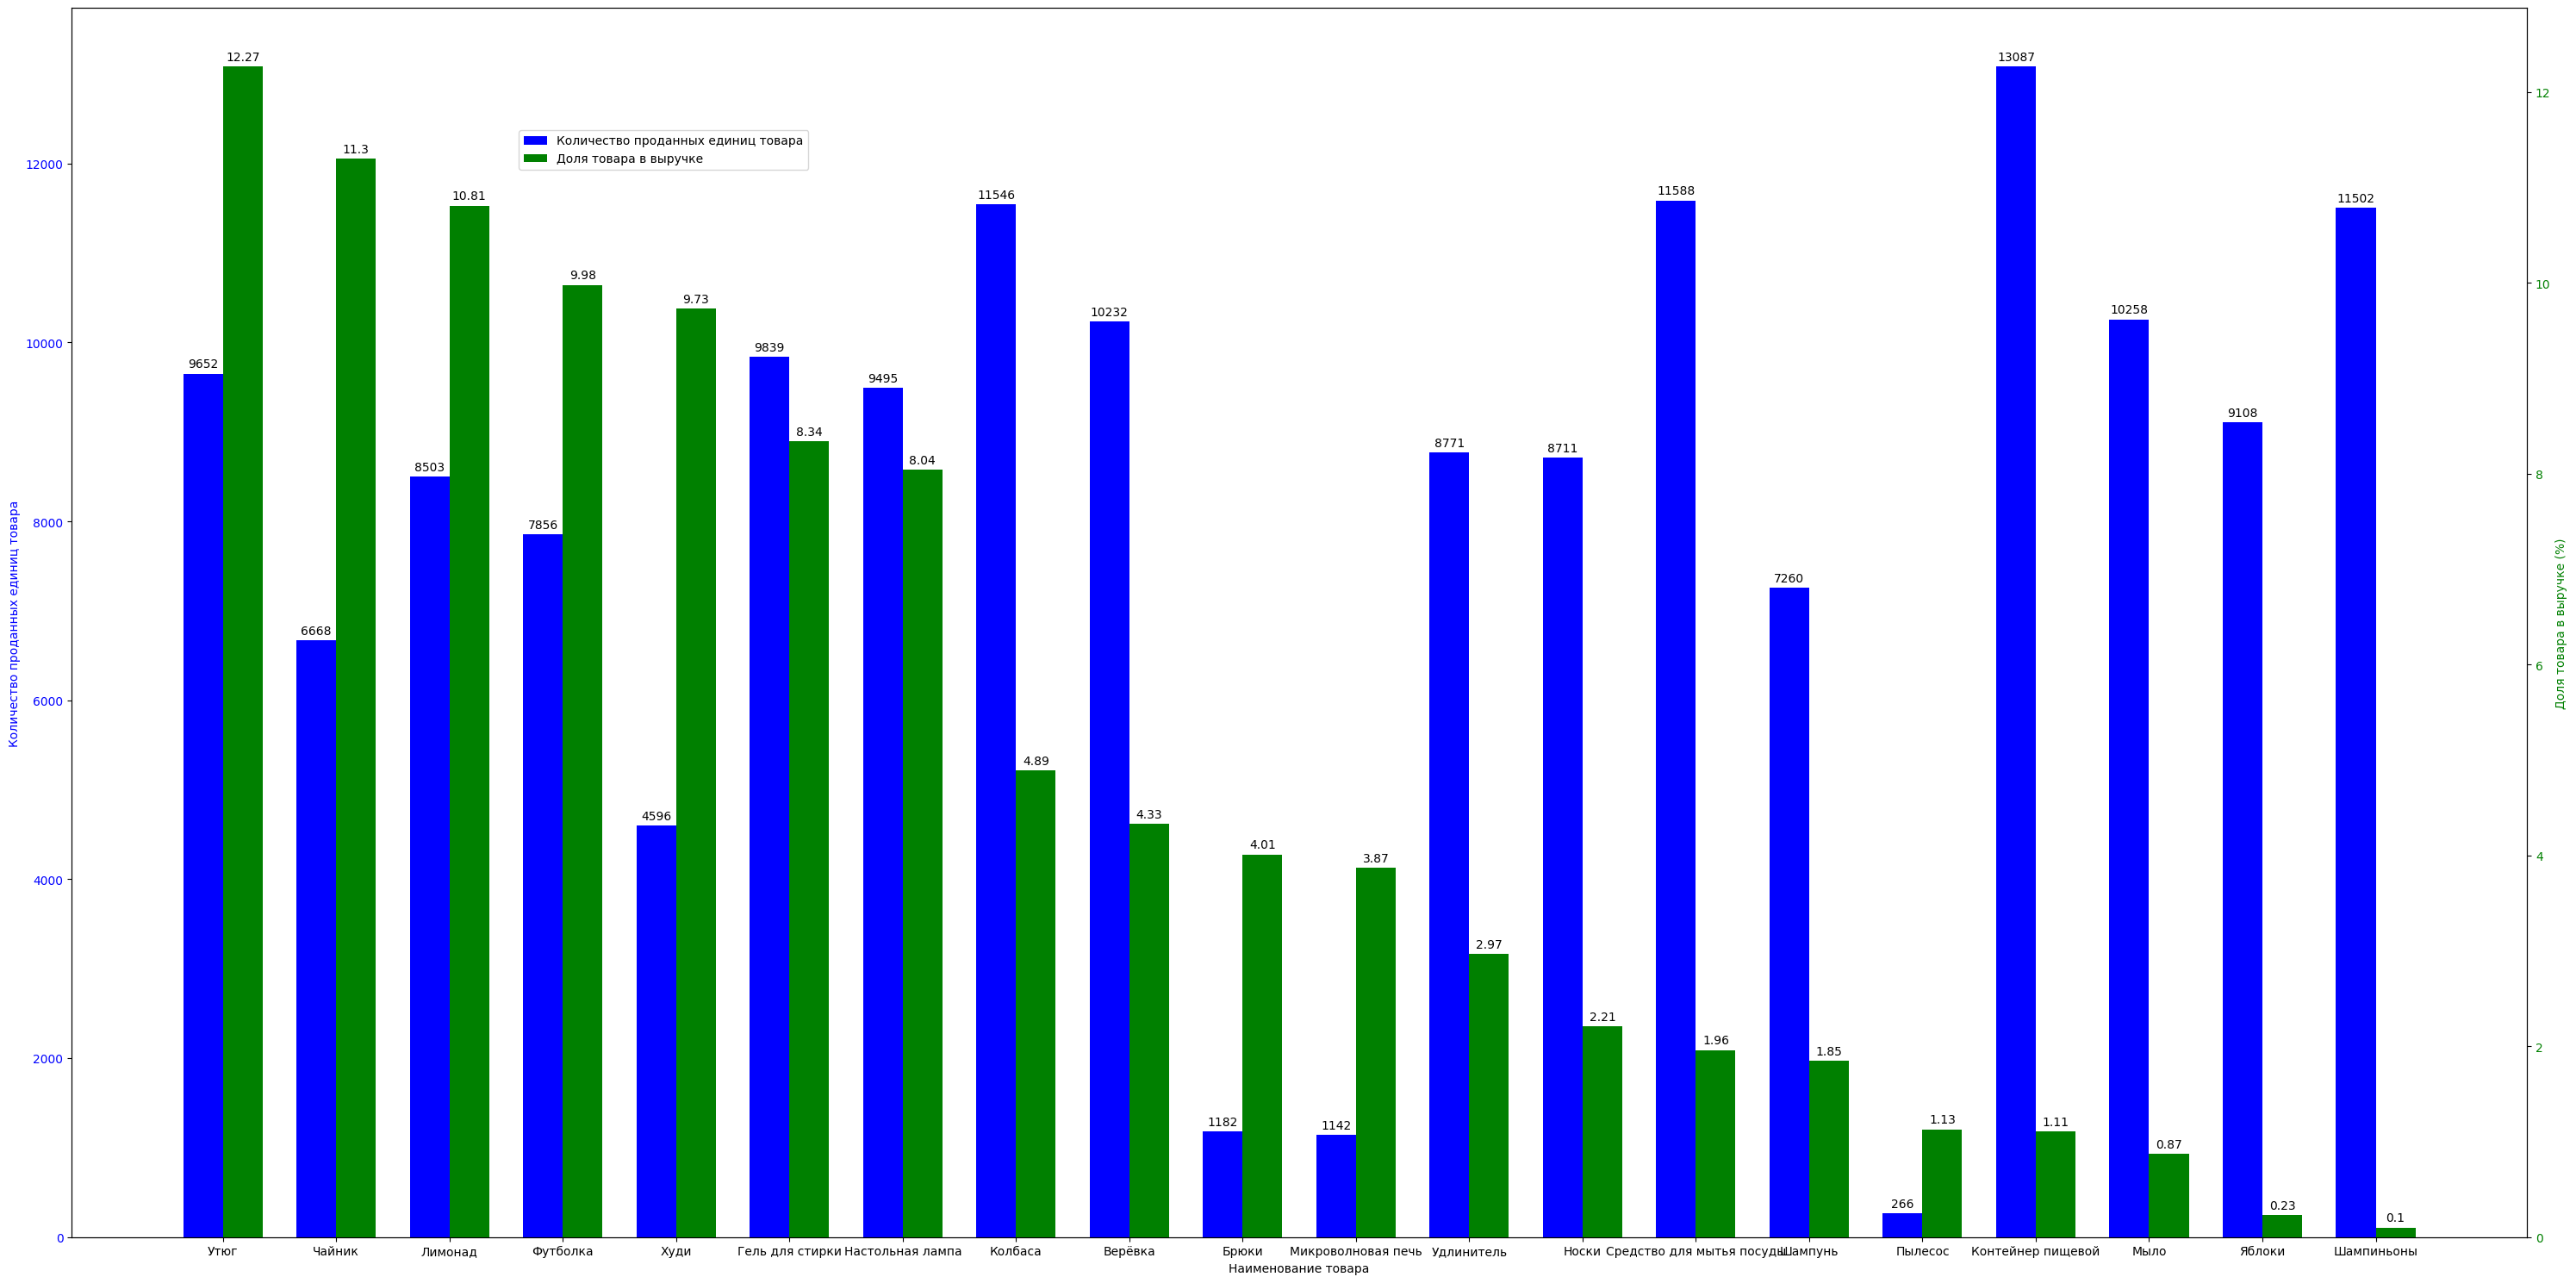

In [136]:
hash_data = read_csv("orders.csv")
total_revenue = count_total_revenue(hash_data)
product_with_max_quantity = find_product_with_max_quantity(hash_data)
product_with_max_cost = find_product_with_max_cost(hash_data)
data = find_parts_in_revenue(hash_data, total_revenue)

sort_key_column = input("По какому значению сортировать товары:\n1 - по проданному количеству\n2 - по доле в выручке")
if sort_key_column == "1":
    sort_key_column = "Quantity"
elif sort_key_column == "2":
    sort_key_column = "Revenue part"
else:
    sort_key_column = "Product name"

sort(data, sort_key_column)

text_report(total_revenue, product_with_max_quantity, product_with_max_cost, data)
graph_report(data)
